## Подключение библиотек и пакетов

In [1]:
import numpy as np
import pandas as pd
import os
from time import time

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка предобработанных данных

Настройка глобальных переменных

In [2]:
if 'google.colab' in str(get_ipython()):
    data_dir = os.path.join(os.getcwd(), '/content/data/car_price')
else:
    data_dir = os.path.join(os.getcwd(), '../../../data/car_price')


img_dir = os.path.join(os.getcwd(), 'img_knn')
if not os.path.isdir(img_dir):
    os.mkdir(img_dir)

Загрузка данных с репозитория

In [3]:
if 'google.colab' in str(get_ipython()):
    !pip install rm
    !pip install wget
    !pip install gzip-reader
    !rm -r /content/data
    !wget -P data/weatherAUS https://raw.githubusercontent.com/Aynur19/Machine-Learning/main/data/car_price/car_price_prepocessed.csv

Чтение и просмотр данных

In [4]:
if 'google.colab' in str(get_ipython()):
    !pip install rm
    !pip install wget
    !pip install gzip-reader
    !rm -r /content/data
    !wget -P data/car_price https://raw.githubusercontent.com/Aynur19/Machine-Learning/main/data/car_price/car_price_prepocessed.csv

Чтение данных

In [5]:
df = pd.read_csv(os.path.join(data_dir, 'car_price_prepocessed.csv'))
df.head()

,km,price,Audi A1,Audi A3,Compact,Convertible,Coupe,Other,Sedans,Station wagon,...,Shift paddles,Ski bag,Sport package,Sport seats,Sport suspension,Touch screen,Trailer hitch,Tuned car,Voice Control,Winter tyres
0,56013,15770,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,80000,14500,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
2,83450,14640,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,73000,14500,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,16200,16790,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0


Разделение данных на матрицу признаков и вектор ответов

In [6]:
y = df['price'].values
x = df.drop(['price'], axis=1).values

Разделение данных на обучающие и тестовые выборки

In [7]:
from sklearn.model_selection import train_test_split

# разделение выборок на обучающую и тестовую в соотношении 75/25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=False, random_state=42)

## Метод ближайших соседей (KNN)

Подключение необходимых модулей

In [8]:
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import median_absolute_error

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MaxAbsScaler

from sklearn.neighbors import KNeighborsRegressor

### Функция для быстрого применения модели KNN

Создание и обучение модели; кросс-валидация модели; вычисление точности работы алгоритма на обучающей и тестовой выборках; построение графиков разброса предсказанных значений и имеющихся тестовых ответов

In [9]:
def knn_fast_start(lreg_knn: KNeighborsRegressor, x_train, x_test, y_train, y_test,
                   scale_name: str, fig_title: str, img_name: str, img_dir):
  start_time = time()
  lreg_knn.fit(x_train, y_train)
  end_time = time()
  lreg_fit_time_txt = f'KNN algorithm learning time: {(end_time - start_time):.2f} sec.'

  # оценка работы алгоритма на обучающей выборке
  score_knn = lreg_knn.score(x_train, y_train)
  score_knn_txt = f'The accuracy of the KNN algorithm on a training set: {score_knn:.2f}'

  # применение кросс-валидации модели
  start_time = time()
  cross_scores_knn = cross_val_score(lreg_knn, x_train, y_train, scoring='r2', cv=5)
  end_time = time()
  cross_val_time_txt = f'Cross validation time: {(end_time - start_time):.2f} sec.'
  cross_val_result_txt = f'Cross validation results: {(list(map(lambda x: float("{:.2f}".format(x)), cross_scores_knn)))}'

  # применение модели на тестовой выборке и оценка точности
  y_pred = lreg_knn.predict(x_test)
  r2_score_txt = f'Regression Score (R2, coefficient of determination): {r2_score(y_test, y_pred):.3f}'
  variance_score_txt = f'Variance Score: {explained_variance_score(y_test, y_pred):.3f}'
  max_error_txt = f'Max Error: ${max_error(y_test, y_pred):.3f}'
  mean_absolute_error_txt = f'Mean Absolute Error: ${mean_absolute_error(y_test, y_pred):.3f}'
  mean_squared_error_txt = f'Mean Squared Error (RMSE): ${mean_squared_error(y_test, y_pred, squared=True):.3f}'
  median_absolute_error_txt = f'Median Absolute Error: ${median_absolute_error(y_test, y_pred):.3f}'

  lreg_params = f'KNN (K-Nearest Neighbors) model hyperparameters:\
  neighbors={lreg_knn.named_steps["kneighborsregressor"].n_neighbors},\
  algorithm="{lreg_knn.named_steps["kneighborsregressor"].algorithm}",\
  leaf_size={lreg_knn.named_steps["kneighborsregressor"].leaf_size},\
  n_jobs={lreg_knn.named_steps["kneighborsregressor"].n_jobs},\
  p={lreg_knn.named_steps["kneighborsregressor"].p},\
  weights="{lreg_knn.named_steps["kneighborsregressor"].weights}"'

  description = f'{lreg_params}\n{scale_name}\
  \n{lreg_fit_time_txt}\n{score_knn_txt}\
  \n{cross_val_time_txt}\n{cross_val_result_txt}\
  \n{r2_score_txt}\n{variance_score_txt}\
  \n{max_error_txt}\n{mean_absolute_error_txt}\
  \n{mean_squared_error_txt}\n{median_absolute_error_txt}'

  # построение графика разброса регресии предсказанной и имеющейся тестовой
  data = np.concatenate([x_test[:, 0].reshape(-1, 1), y_test.reshape(-1, 1), y_pred.reshape(-1, 1)], axis=1)
  df_data = pd.DataFrame(data, columns=['x_test', 'y_test', 'y_pred'])

  km_to_price, ax = plt.subplots(figsize=(15, 12))
  sns.regplot(x='x_test', y='y_pred', data=df_data, label='Prediction Y', marker='.', ax=ax)
  sns.regplot(x='x_test', y='y_test', data=df_data, label='Test Y', marker='.', ax=ax)
  ax.set_ylabel('Price, $')
  ax.set_xlabel('Kilometers')
  ax.set_title(fig_title)
  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

  ax.text(x=-0.01, y=-0.35, s=description, transform=ax.transAxes, fontsize=12,
          verticalalignment='bottom', bbox=props)
  ax.legend()
 
  plt.savefig(os.path.join(img_dir, img_name))

Применение модели KNN с гиперпараметрами по умолчанию на не отмасштабированных данных

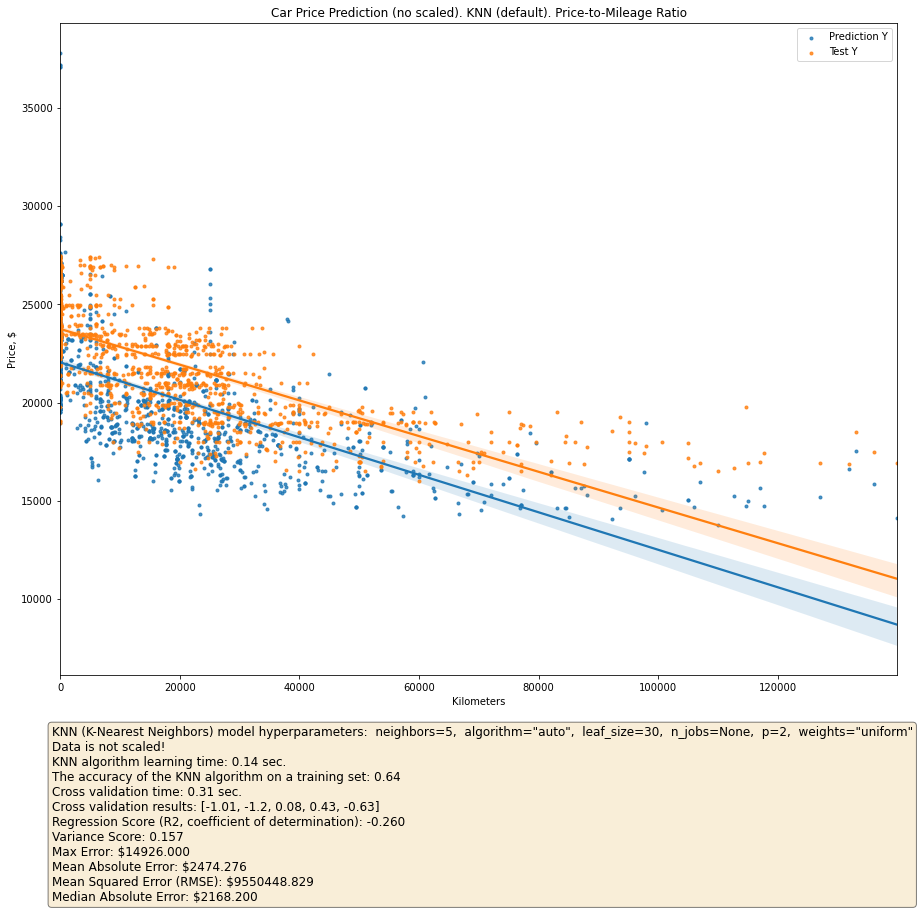

In [10]:
lreg_knn = make_pipeline(KNeighborsRegressor())
knn_fast_start(lreg_knn, x_train, x_test, y_train, y_test,
               scale_name='Data is not scaled!',
               fig_title='Car Price Prediction (no scaled). KNN (default). Price-to-Mileage Ratio', 
               img_name='Car Price Prediction (no scaled). KNN (default). Price-to-Mileage Ratio.png', 
               img_dir=img_dir)

Применение модели KNN с гиперпараметрами по умолчанию на данный, отмасштабированных с помощью StandardScaler()

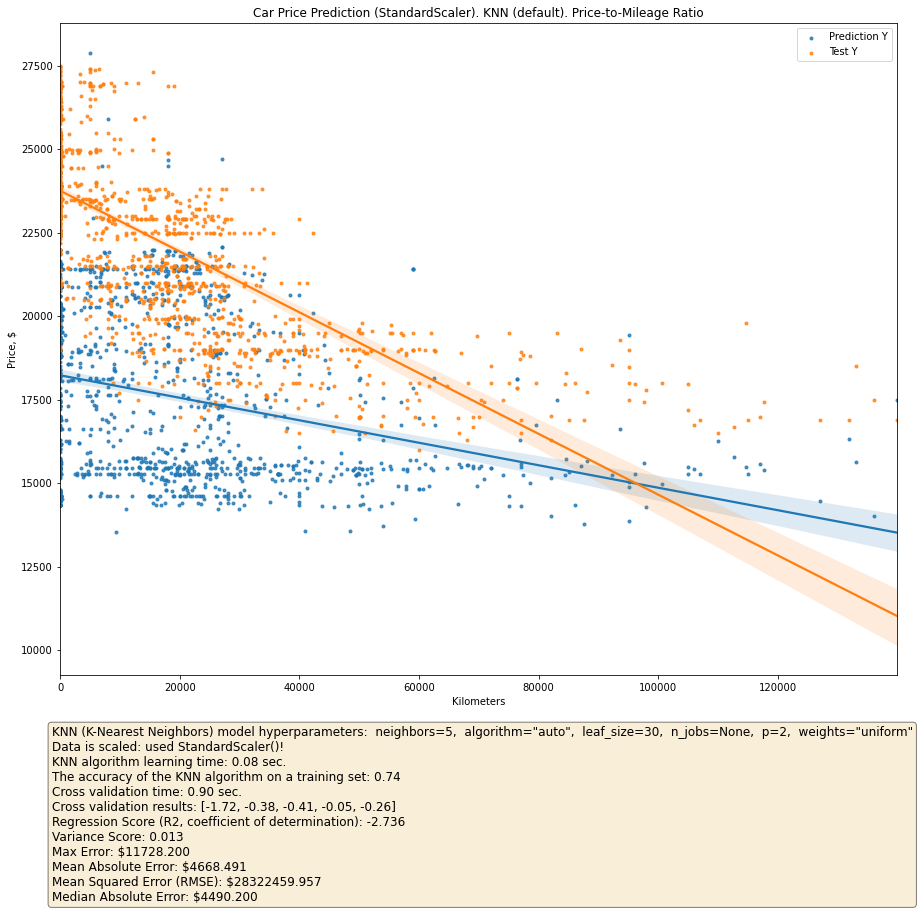

In [11]:
lreg_knn = make_pipeline(StandardScaler(), KNeighborsRegressor())
knn_fast_start(lreg_knn, x_train, x_test, y_train, y_test,
               scale_name='Data is scaled: used StandardScaler()!',
               fig_title='Car Price Prediction (StandardScaler). KNN (default). Price-to-Mileage Ratio', 
               img_name='Car Price Prediction (StandardScaler). KNN (default). Price-to-Mileage Ratio.png', 
               img_dir=img_dir)

Применение модели KNN с гиперпараметрами по умолчанию на данных, отмасштабированных с помощью Normalizer()

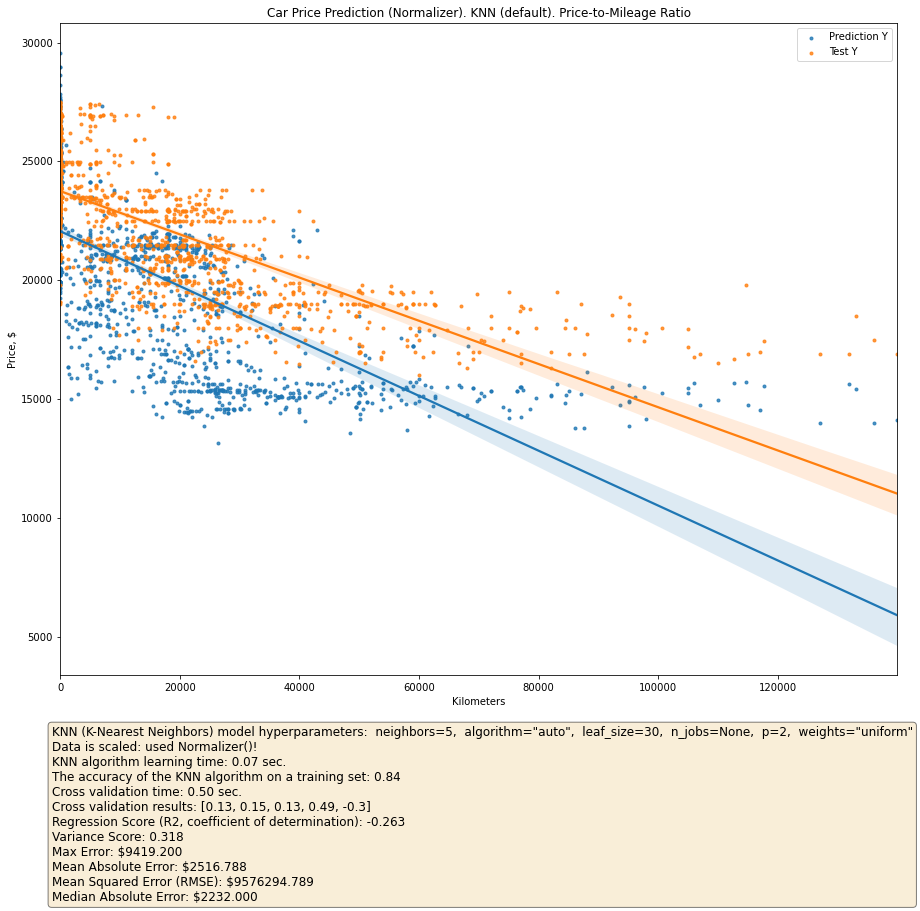

In [12]:
lreg_knn = make_pipeline(Normalizer(), KNeighborsRegressor())
knn_fast_start(lreg_knn, x_train, x_test, y_train, y_test,
               scale_name='Data is scaled: used Normalizer()!',
               fig_title='Car Price Prediction (Normalizer). KNN (default). Price-to-Mileage Ratio', 
               img_name='Car Price Prediction (Normalizer). KNN (default). Price-to-Mileage Ratio.png', 
               img_dir=img_dir)

Применение модели KNN с гиперпараметрами по умолчанию на данных, отмасштабированных с помощью MinMaxScaler()

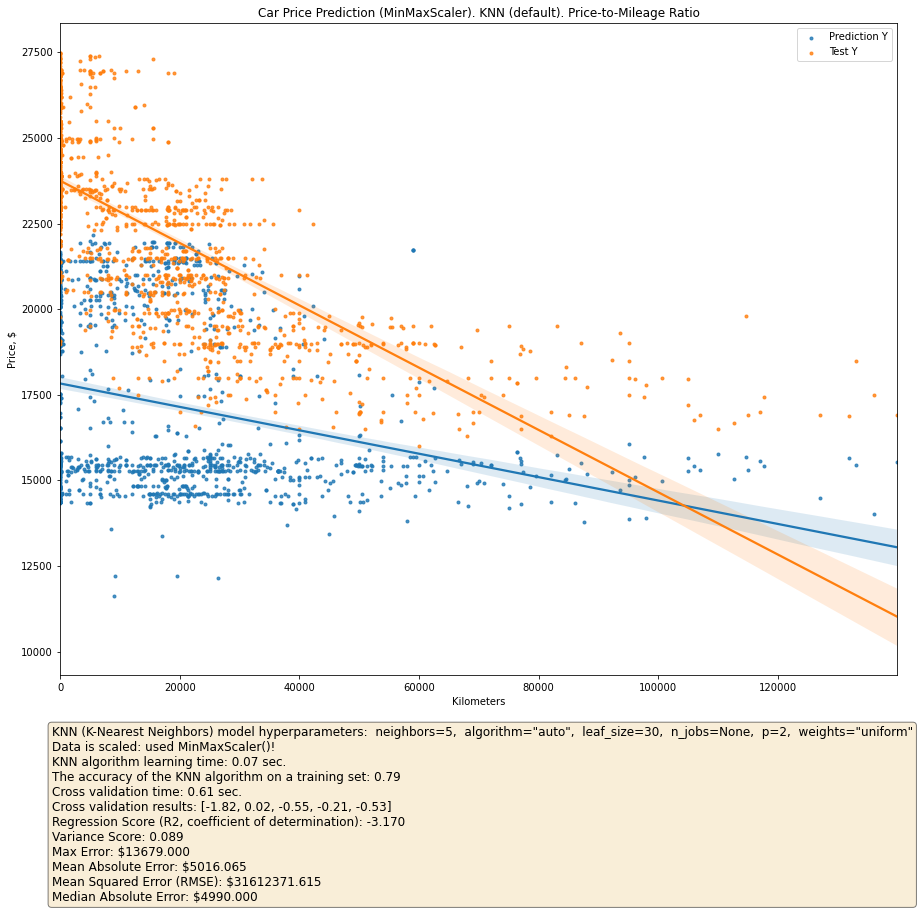

In [13]:
lreg_knn = make_pipeline(MinMaxScaler(), KNeighborsRegressor())
knn_fast_start(lreg_knn, x_train, x_test, y_train, y_test,
               scale_name='Data is scaled: used MinMaxScaler()!',
               fig_title='Car Price Prediction (MinMaxScaler). KNN (default). Price-to-Mileage Ratio', 
               img_name='Car Price Prediction (MinMaxScaler). KNN (default). Price-to-Mileage Ratio.png', 
               img_dir=img_dir)

Применение модели KNN с гиперпараметрами по умолчанию на данных, отмасштабированных с помощью MaxAbsScaler()

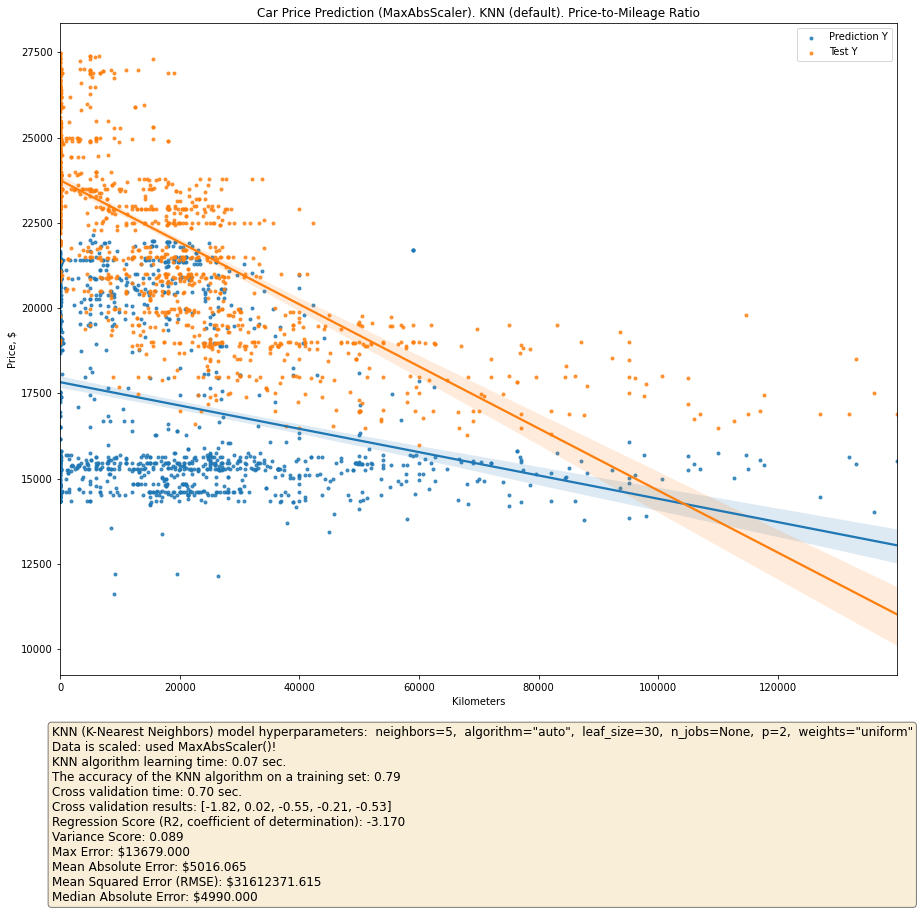

In [14]:
lreg_knn = make_pipeline(MaxAbsScaler(), KNeighborsRegressor())
knn_fast_start(lreg_knn, x_train, x_test, y_train, y_test,
               scale_name='Data is scaled: used MaxAbsScaler()!',
               fig_title='Car Price Prediction (MaxAbsScaler). KNN (default). Price-to-Mileage Ratio', 
               img_name='Car Price Prediction (MaxAbsScaler). KNN (default). Price-to-Mileage Ratio.png', 
               img_dir=img_dir)

### Перебор моделей KNN с различным количеством соседей

Функция перебора моделей KNN с разным количеством соседей и вывода графика среднего значения ошибок от количества соседей

In [15]:
def plot_knn_error_rate(x_train, y_train, scaler=None, scaling: str='', max_neighbors=40):
  error_rate = {}
  start_time = time()
  for i in range(1, max_neighbors + 1):
    if scaler is None:
      lreg_knn = make_pipeline(KNeighborsRegressor(n_neighbors=i))
    else:
      lreg_knn = make_pipeline(scaler, KNeighborsRegressor(n_neighbors=i))

    score = cross_val_score(lreg_knn, x_train, y_train)
    error_rate[i] = 1 - score.mean()
  end_time = time()

  search_time_txt = f'Searching time for KNN models with a different number of neighbors \
  (from 1 to {max_neighbors}) on a training set: {(end_time - start_time):.2f} sec'

  knn_sorted = list(dict(sorted(error_rate.items(), key=lambda x: x[1])).items())
  knn_best_models_txt = f'Best models: \
  \nneighbors = {knn_sorted[0][0]}, error = {knn_sorted[0][1]:.3f} \
  \nneighbors = {knn_sorted[1][0]}, error = {knn_sorted[1][1]:.3f} \
  \nneighbors = {knn_sorted[2][0]}, error = {knn_sorted[2][1]:.3f} \
  \nneighbors = {knn_sorted[3][0]}, error = {knn_sorted[3][1]:.3f} \
  \nneighbors = {knn_sorted[4][0]}, error = {knn_sorted[4][1]:.3f}'
  
  title = f'K value vs Error rate {scaling}'

  plt.title(title)
  plt.xlabel('K value')
  plt.ylabel('Error rate')
  description = f'{search_time_txt}\n{knn_best_models_txt}'
  props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

  plt.figtext(x=.1, y=1, s=description, ha='left', fontsize=12, bbox=props)
  plt.plot(range(1, max_neighbors + 1), list(error_rate.values()), color='red', linestyle='dashed', marker='.', 
          markerfacecolor='blue', markersize=10)
  
  plt.savefig(f'{os.path.join(img_dir, title)}.png')

Перебор моделей KNN от 1 до 40 соседей на не отмасштаированных данных

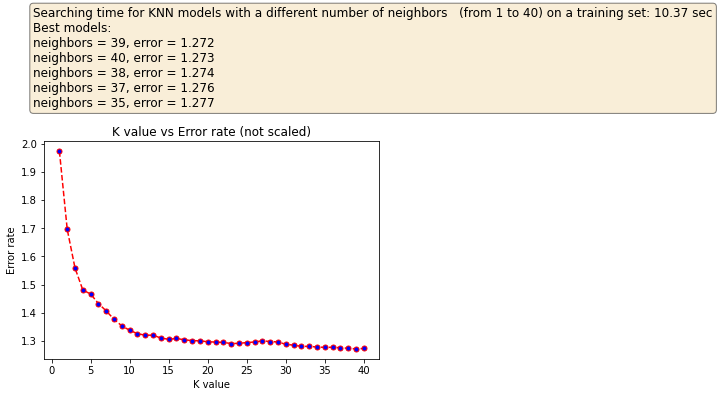

In [16]:
plot_knn_error_rate(x_train, y_train, scaler=None, scaling='(not scaled)', max_neighbors=40)

Перебор моделей KNN от 1 до 40 соседей на данных, отмасштабированных с помощью StandardScaler()

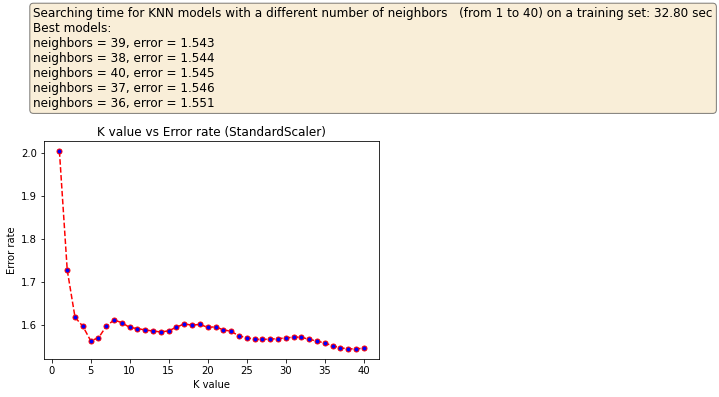

In [17]:
plot_knn_error_rate(x_train, y_train, scaler=StandardScaler(), scaling='(StandardScaler)', max_neighbors=40)

Перебор моделей KNN от 1 до 40 соседей на данных, отмасштабированных с помощью Normalizer()

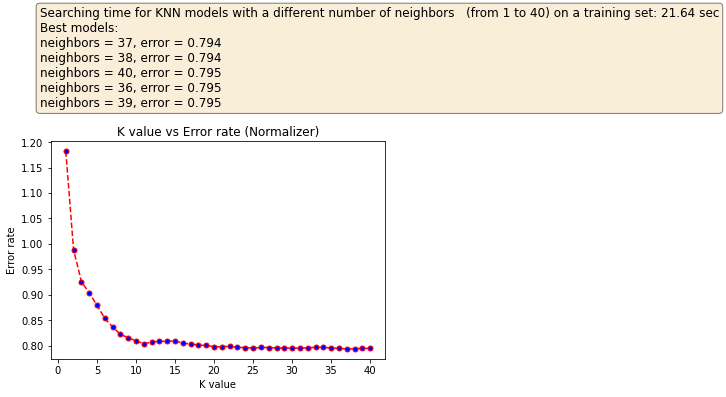

In [18]:
plot_knn_error_rate(x_train, y_train, scaler=Normalizer(), scaling='(Normalizer)', max_neighbors=40)

Перебор моделей KNN от 1 до 40 соседей на данных, отмасштабированных с помощью MinMaxScaler()

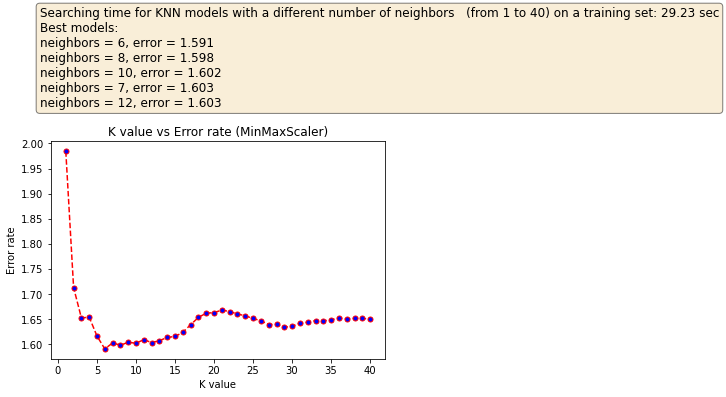

In [19]:
plot_knn_error_rate(x_train, y_train, scaler=MinMaxScaler(), scaling='(MinMaxScaler)', max_neighbors=40)

Перебор моделей KNN от 1 до 40 соседей на данных, отмасштабированных с помощью MaxAbsScaler()

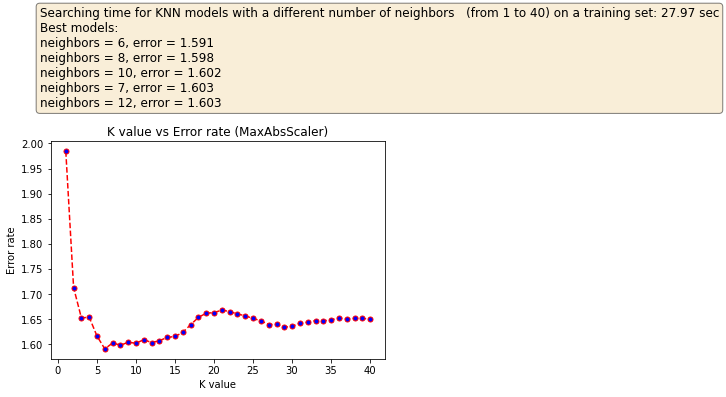

In [20]:
plot_knn_error_rate(x_train, y_train, scaler=MaxAbsScaler(), scaling='(MaxAbsScaler)', max_neighbors=40)

### Подбор гиперпараметров с помощью GridSearchCV

Функция подбора гиперпараметров модели с помощью `GridSearchCV`. Код закомментирован, так как нужен для выполнения всего 1 раз и затем найденные гиперпараметры используются. Порой подбор гиперпараметров занимает очень много времени

In [21]:
from sklearn.model_selection import GridSearchCV

def knn_get_best_params(x_train, y_train):
  param_grid = { 
      'n_neighbors': [5, 7, 10, 13, 15, 17, 20, 23, 25, 27, 30, 33, 35, 37, 40],
      'weights': ['uniform', 'distance'],
      'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
      'leaf_size': [15, 30, 45],
      'p': [1, 2],
      'n_jobs': [-1],
  }

  lreg = KNeighborsRegressor()

  search = GridSearchCV(lreg, param_grid, n_jobs=-1)
  start_time = time()
  results = search.fit(x_train, y_train)
  end_time = time()
  
  print('Mean Accuracy: %.3f' % results.best_score_)
  print('Config: %s' % results.best_params_)
  print(f'Time to find parameters for the model (KNN) through the use of GridSearchCV: {(end_time - start_time):.2f} sec.')

Подбор гиперпараметров для не отмасштаированных данных

In [22]:
knn_get_best_params(x_train, y_train)

Mean Accuracy: -0.266
Config: {'algorithm': 'brute', 'leaf_size': 15, 'n_jobs': -1, 'n_neighbors': 40, 'p': 1, 'weights': 'uniform'}
Time to find parameters for the model (KNN) through the use of GridSearchCV: 121.94 sec.


Применение модели KNN с гиперпараметрами, подобранными с помощью GridSearchCV, на не отмасштаированных данных

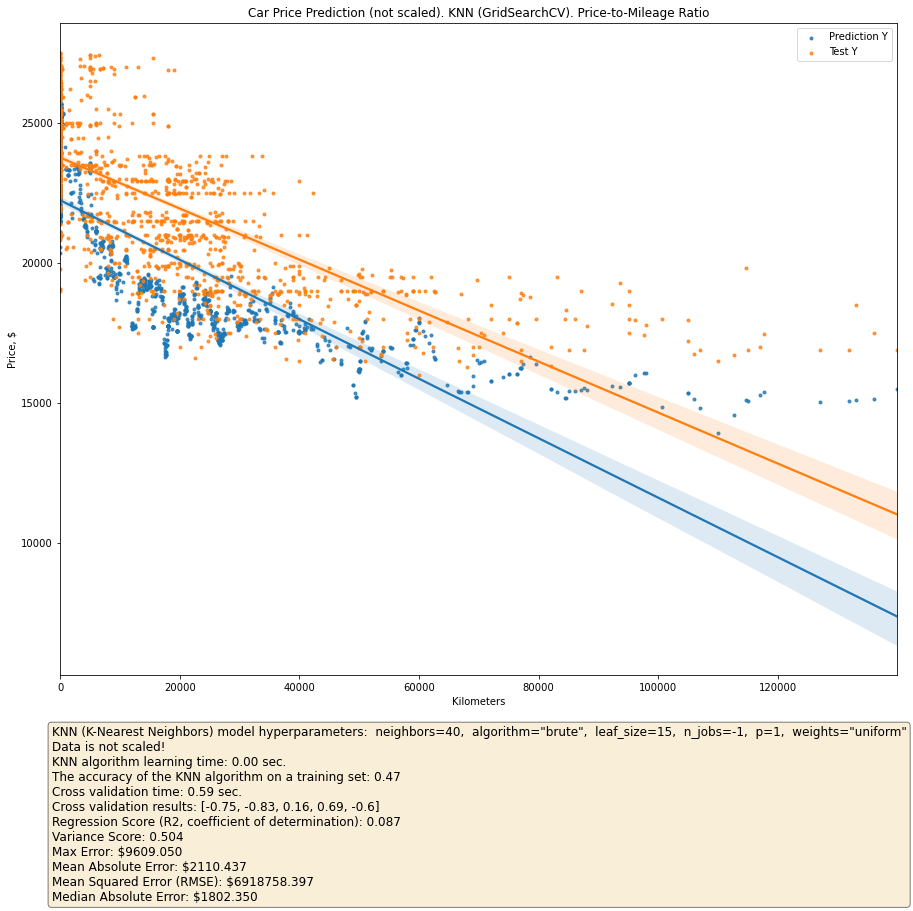

In [23]:
lreg_knn_cv = make_pipeline(KNeighborsRegressor(n_neighbors=40, algorithm='brute', leaf_size=15, 
                                                n_jobs=-1, p=1, weights='uniform'))
knn_fast_start(lreg_knn_cv, x_train, x_test, y_train, y_test,
               scale_name='Data is not scaled!',
               fig_title='Car Price Prediction (not scaled). KNN (GridSearchCV). Price-to-Mileage Ratio', 
               img_name='Car Price Prediction (not scaled). KNN (GridSearchCV). Price-to-Mileage Ratio.png', 
               img_dir=img_dir)

Применение модели KNN с гиперпараметрами, подобранными с помощью GridSearchCV, на данных, отмасштабированных с помощью StandardScaler()

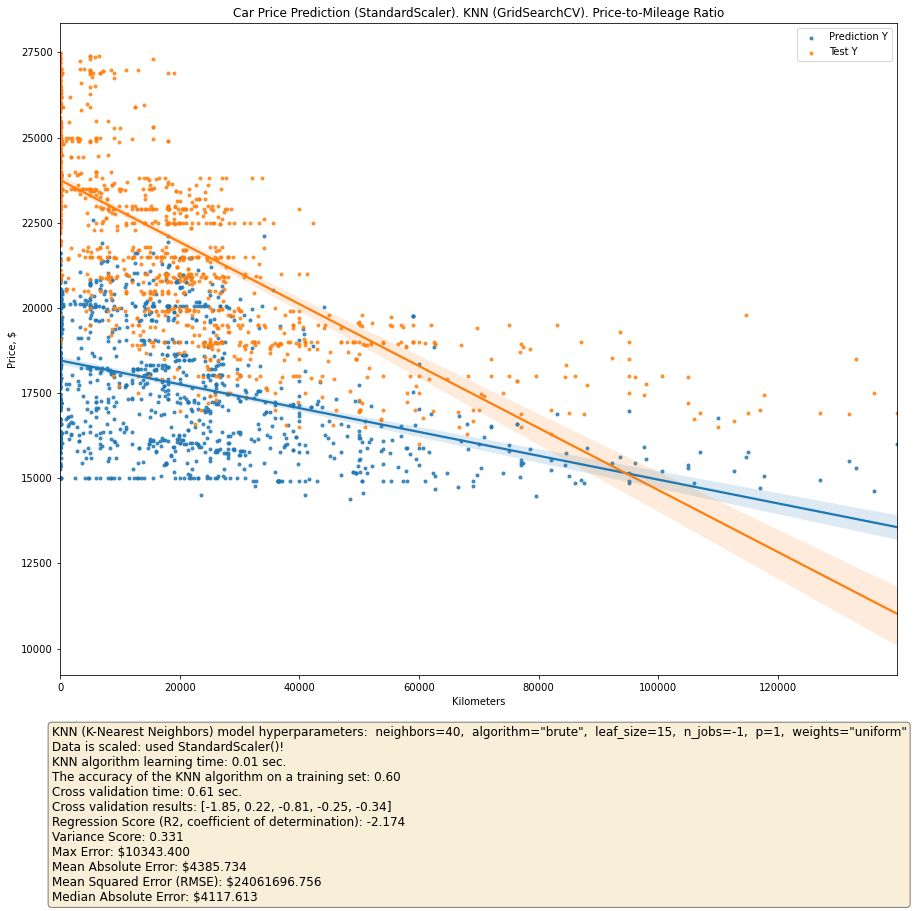

In [24]:
lreg_knn_cv = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=40, algorithm='brute', leaf_size=15, 
                                                n_jobs=-1, p=1, weights='uniform'))
knn_fast_start(lreg_knn_cv, x_train, x_test, y_train, y_test,
               scale_name='Data is scaled: used StandardScaler()!',
               fig_title='Car Price Prediction (StandardScaler). KNN (GridSearchCV). Price-to-Mileage Ratio', 
               img_name='Car Price Prediction (StandardScaler). KNN (GridSearchCV). Price-to-Mileage Ratio.png', 
               img_dir=img_dir)

Применение модели KNN с гиперпараметрами, подобранными с помощью GridSearchCV, на данных, отмасштабированных с помощью Normalizer()

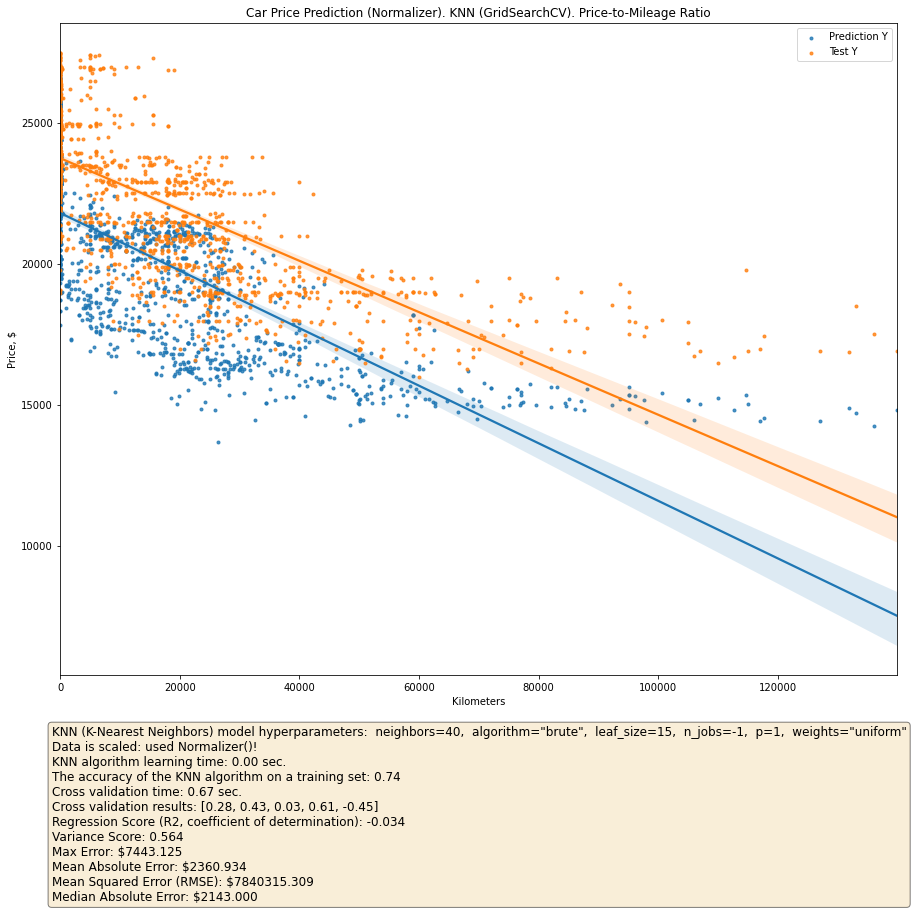

In [25]:
lreg_knn_cv = make_pipeline(Normalizer(), KNeighborsRegressor(n_neighbors=40, algorithm='brute', leaf_size=15, 
                                                n_jobs=-1, p=1, weights='uniform'))
knn_fast_start(lreg_knn_cv, x_train, x_test, y_train, y_test,
               scale_name='Data is scaled: used Normalizer()!',
               fig_title='Car Price Prediction (Normalizer). KNN (GridSearchCV). Price-to-Mileage Ratio', 
               img_name='Car Price Prediction (Normalizer). KNN (GridSearchCV). Price-to-Mileage Ratio.png', 
               img_dir=img_dir)

Применение модели KNN с гиперпараметрами, подобранными с помощью GridSearchCV, на данных, отмасштабированных с помощью MinMaxScaler()

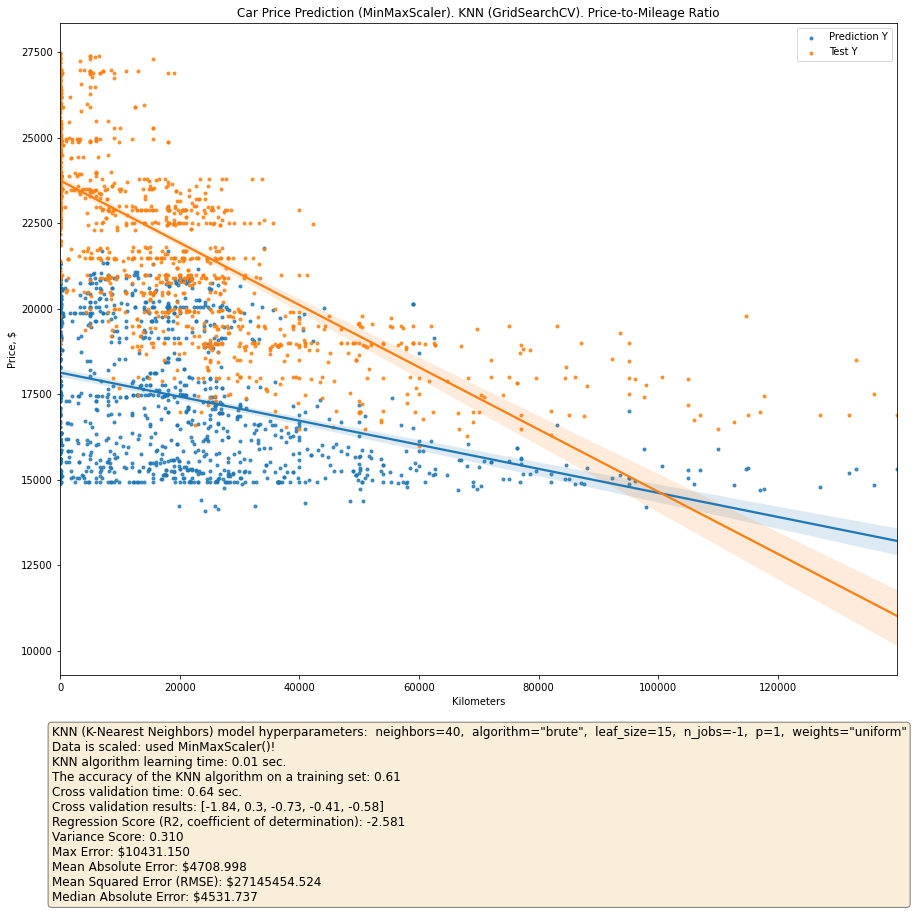

In [26]:
lreg_knn_cv = make_pipeline(MinMaxScaler(), KNeighborsRegressor(n_neighbors=40, algorithm='brute', leaf_size=15, 
                                                n_jobs=-1, p=1, weights='uniform'))
knn_fast_start(lreg_knn_cv, x_train, x_test, y_train, y_test,
               scale_name='Data is scaled: used MinMaxScaler()!',
               fig_title='Car Price Prediction (MinMaxScaler). KNN (GridSearchCV). Price-to-Mileage Ratio', 
               img_name='Car Price Prediction (MinMaxScaler). KNN (GridSearchCV). Price-to-Mileage Ratio.png', 
               img_dir=img_dir)

Применение модели KNN с гиперпараметрами, подобранными с помощью GridSearchCV, на данных, отмасштабированных с помощью MaxAbsScaler()

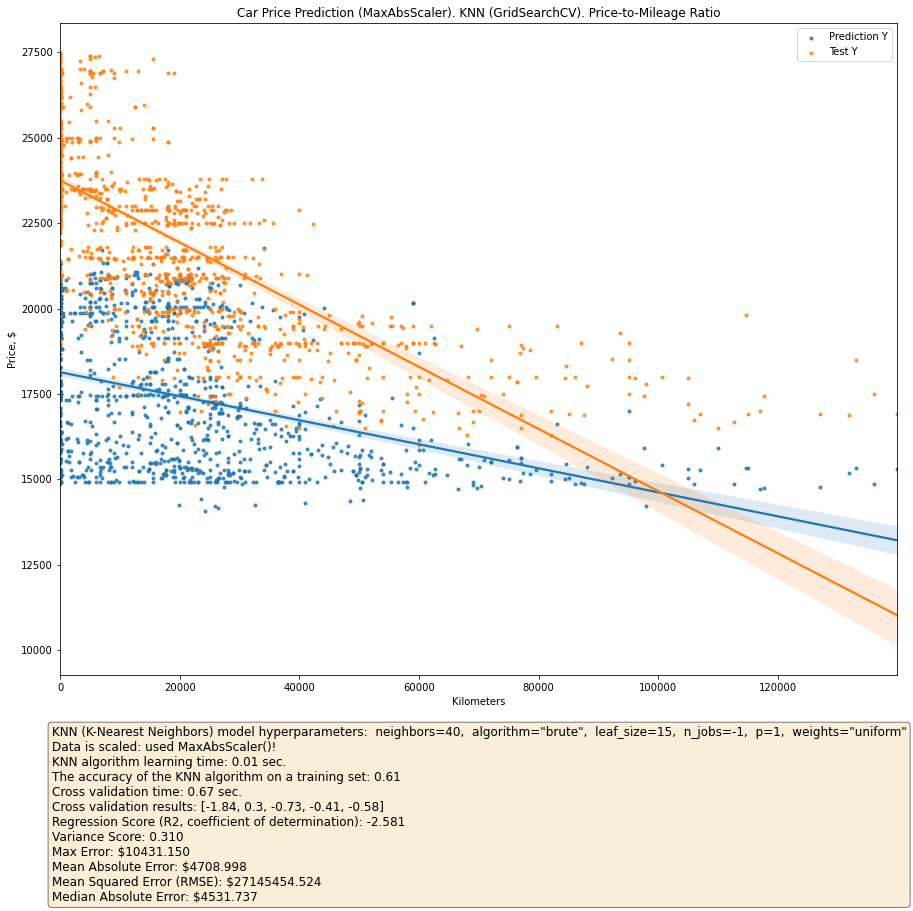

In [27]:
lreg_knn_cv = make_pipeline(MaxAbsScaler(), KNeighborsRegressor(n_neighbors=40, algorithm='brute', leaf_size=15, 
                                                n_jobs=-1, p=1, weights='uniform'))
knn_fast_start(lreg_knn_cv, x_train, x_test, y_train, y_test,
               scale_name='Data is scaled: used MaxAbsScaler()!',
               fig_title='Car Price Prediction (MaxAbsScaler). KNN (GridSearchCV). Price-to-Mileage Ratio', 
               img_name='Car Price Prediction (MaxAbsScaler). KNN (GridSearchCV). Price-to-Mileage Ratio.png', 
               img_dir=img_dir)

## Выводы:
1. На неотмасштабированных данных модели **KNN** работают чуть лучше
2. Не всегда гиперпараметры, подобранные через `GridSearchCV` дают прирост в точности
3. Модель **KNN** работает быстро